__Permutation Test__  
Average non-pathological brain age gap vs. average pathological brain age gap

In [1]:
import sys
sys.path.insert(0, '/home/jovyan/braindecode/')
sys.path.insert(0, '/home/jovyan/mne-python/')
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.metrics import mean_absolute_error

from decode_tueg import plot_violin

In [21]:
subject_wise = True
longitudinal = 'transition'
df = pd.read_csv(f'/home/jovyan/220824_5fcv_huber_longitudinal_{longitudinal}.csv', index_col=0)
# --- hack
with open(f'/home/jovyan/longitudinal/{longitudinal}.pkl', 'rb') as f:
    ds = pickle.load(f)
df['subject'] = 5*ds.description['subject'].to_list()
# ---
if subject_wise:
    df = df.groupby(['subject', 'pathological'], as_index=False).mean()
orig_df = df

In [22]:
orig_df['gap'] = orig_df.y_true - orig_df.y_pred
orig_df_mean = orig_df.groupby('pathological').mean()
orig_mean_gap_diff = orig_df_mean.loc[False, 'gap'] - orig_df_mean.loc[True, 'gap']
orig_mean_gap_diff

0.6168601298438041

In [23]:
gaps = orig_df['gap'].to_numpy()

In [24]:
n_repetitions = 100000

In [25]:
mean_gap_diffs = []
for n in range(n_repetitions):
    choices = np.random.choice(2, len(gaps))
    gaps0 = gaps[choices==0]
    gaps1 = gaps[choices==1]
    mean_gap_diff = gaps0.mean() - gaps1.mean()
    mean_gap_diffs.append(mean_gap_diff)

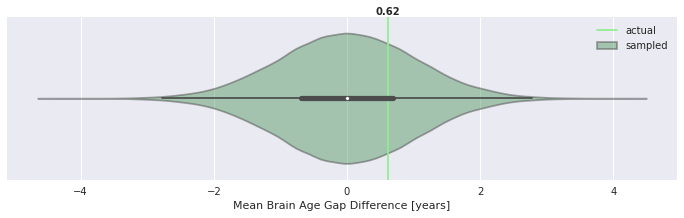

In [26]:
ax = plot_violin(orig_mean_gap_diff, mean_gap_diffs)
ax.set_xlabel('Mean Brain Age Gap Difference [years]')
# ax.set_xlim(-max(ax.get_xlim()), max(ax.get_xlim()))
# fig.savefig('/home/jovyan/permutation_test.png', bbox_inches='tight', dpi=300)
# ax.get_figure().savefig('/home/jovyan/permutation_test_longitudinal_transition_subj.png', bbox_inches='tight', dpi=300)

__permutation test proxy acc__

In [27]:
df = pd.read_csv('/home/jovyan/220824_5fcv_huber.csv', index_col=0)
# only look at valid set
df = df[df.split == 'valid']
df = df[df.subset=='mixed']

In [28]:
mean_absolute_error(df.y_true, df.y_pred)

9.395337378707762

In [29]:
df['gap'] = df.y_true - df.y_pred

In [62]:
df['proxy'] = df['gap'] > 7.33

In [63]:
acc = (df.proxy == df.pathological).mean() * 100

In [64]:
#TODO this is not the same acc as in acc thresh plot. why?

In [65]:
acc

57.33382844411437

In [32]:
df.proxy.value_counts()

False    1968
True      725
Name: proxy, dtype: int64

In [33]:
n_repetitions = 100000

In [34]:
accs = []
for n in range(n_repetitions):
    choices = np.random.choice(2, len(df))
    accs.append((choices == df.pathological).mean()*100)

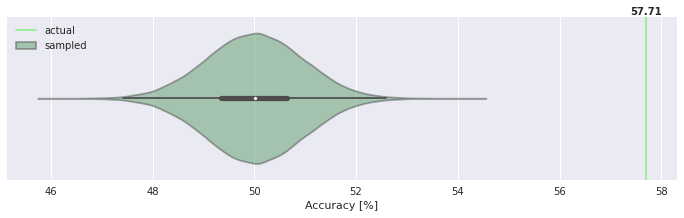

In [39]:
ax = plot_violin(acc, accs)
# fig.savefig('/home/jovyan/permutation_test_proxy.png', bbox_inches='tight', dpi=300)